In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=599726dbf52ee568e516f9a9e5d449e4b31e1ad3b00985f78b0d4874ccdfae3b
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()


In [ ]:
df=spark.read.csv(r'EV_INDIA.csv',header=True,inferSchema=True)

In [ ]:
df.show()

+------+----------+--------------------+----+----------+----+--------------------+-------------------+
|region|  category|           parameter|mode|powertrain|year|                unit|              value|
+------+----------+--------------------+----+----------+----+--------------------+-------------------+
| India|Historical|            EV sales|Cars|       BEV|2010|            Vehicles|              450.0|
| India|Historical|            EV stock|Cars|       BEV|2010|            Vehicles|              880.0|
| India|Historical|      EV sales share|Cars|        EV|2010|             percent|  0.020999999716878|
| India|Historical|      EV stock share|Cars|        EV|2010|             percent|  0.004999999888241|
| India|Historical|Oil displacement Mbd|Cars|        EV|2010|Milion barrels pe...| 2.2000000171829E-5|
| India|Historical|Oil displacement,...|Cars|        EV|2010|Oil displacement,...|   1.29999995231628|
| India|Historical|Oil displacement Mbd|Cars|        EV|2011|Milion barre

In [ ]:
from pyspark.sql.functions import col
df.where(col("year")<=2024).tail(10)

[Row(region='India', category='Historical', parameter='EV sales', mode='Buses', powertrain='BEV', year=2023, unit='Vehicles', value=2300.0),
 Row(region='India', category='Projection-STEPS', parameter='EV charging points', mode='EV', powertrain='Publicly available fast', year=2023, unit='charging points', value=4100.0),
 Row(region='India', category='Projection-STEPS', parameter='EV charging points', mode='EV', powertrain='Publicly available slow', year=2023, unit='charging points', value=6800.0),
 Row(region='India', category='Projection-APS', parameter='Electricity demand', mode='Buses', powertrain='EV', year=2023, unit='GWh', value=790.0),
 Row(region='India', category='Projection-APS', parameter='Electricity demand', mode='Vans', powertrain='EV', year=2023, unit='GWh', value=44.0),
 Row(region='India', category='Projection-APS', parameter='Electricity demand', mode='Cars', powertrain='EV', year=2023, unit='GWh', value=410.0),
 Row(region='India', category='Historical', parameter='E

In [ ]:
df0=df.where(col("year")<=2024)
df0.show()

+------+----------+--------------------+----+----------+----+--------------------+-------------------+
|region|  category|           parameter|mode|powertrain|year|                unit|              value|
+------+----------+--------------------+----+----------+----+--------------------+-------------------+
| India|Historical|            EV sales|Cars|       BEV|2010|            Vehicles|              450.0|
| India|Historical|            EV stock|Cars|       BEV|2010|            Vehicles|              880.0|
| India|Historical|      EV sales share|Cars|        EV|2010|             percent|  0.020999999716878|
| India|Historical|      EV stock share|Cars|        EV|2010|             percent|  0.004999999888241|
| India|Historical|Oil displacement Mbd|Cars|        EV|2010|Milion barrels pe...| 2.2000000171829E-5|
| India|Historical|Oil displacement,...|Cars|        EV|2010|Oil displacement,...|   1.29999995231628|
| India|Historical|Oil displacement Mbd|Cars|        EV|2011|Milion barre

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
df1=df0.toPandas()

In [ ]:
df1['powertrain']=df1['powertrain'].replace(['BEV','PHEV','FCEV','EV','Publicly available fast','Publicly available slow'],[0,0.2,0.4,0.6,0.8,1])

<ipython-input-29-aa61a63204dd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['powertrain']=df1['powertrain'].replace(['BEV','PHEV','FCEV','EV','Publicly available fast','Publicly available slow'],[0,0.2,0.4,0.6,0.8,1])


In [ ]:
df1

,region,category,parameter,mode,powertrain,year,unit,value
0,India,Historical,EV sales,Cars,0.0,2010,Vehicles,450.000000
1,India,Historical,EV stock,Cars,0.0,2010,Vehicles,880.000000
2,India,Historical,EV sales share,Cars,0.6,2010,percent,0.021000
3,India,Historical,EV stock share,Cars,0.6,2010,percent,0.005000
4,India,Historical,Oil displacement Mbd,Cars,0.6,2010,Milion barrels per day,0.000022
...,...,...,...,...,...,...,...,...
428,India,Projection-APS,Electricity demand,Cars,0.6,2023,GWh,410.000000
429,India,Historical,EV stock share,Vans,0.6,2023,percent,0.087000
430,India,Historical,EV sales share,Vans,0.6,2023,percent,0.062000
431,India,Historical,EV sales share,Buses,0.6,2023,percent,6.800000


In [ ]:
num_df =df1.drop(columns=['region','category','parameter','mode','year','unit'])


In [ ]:
num_df

,powertrain,value
0,0.0,450.000000
1,0.0,880.000000
2,0.6,0.021000
3,0.6,0.005000
4,0.6,0.000022
...,...,...
428,0.6,410.000000
429,0.6,0.087000
430,0.6,0.062000
431,0.6,6.800000


In [ ]:
num_df=num_df.dropna()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_df)


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
print("Explained variance ratio of each component:")
print(pca.explained_variance_ratio_)

Explained variance ratio of each component:
[0.64730056 0.35269944]


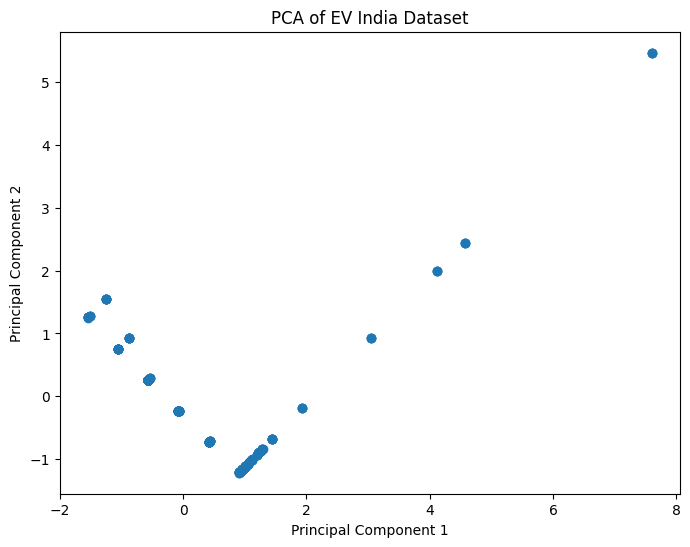

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA of EV India Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### **EXTRACTING** **SEGMENT**